# Sprint6_決定木

In [235]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [240]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*, value=None):
        self.feature = feature 
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False, max_depth=1, n_feats=None):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.n_feats = n_feats
        self.max_depth = max_depth
        self.min_sample_split = 1
        self.root = None
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)


    def _grow_tree(self, X, y, depth=0):
      n_samples, n_features = X.shape
      n_labels = len(np.unique(y) )

      if (depth >= self.max_depth
        or n_labels == 1
        or n_samples < self.min_sample_split):
        leaf_value = self._most_common_label(y)
        
        return Node(value = leaf_value)

      feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
      
      best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
      left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
      left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
      right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
      
      return Node(best_feat, best_thresh, left, right)

    
    def _best_criteria(self, X, y, feat_idxs):
     best_gain = -1
     split_idx, split_threh = None, None

     for feat_idx in feat_idxs:
       X_column = X[:, feat_idx]
       thresholds = np.unique(X_column)

       for threshold in thresholds:
         gain = self._information_gain(y, X_column, threshold)

         if gain > best_gain:
           best_gain = gain
           split_idx = feat_idx
           split_threh = threshold

         return split_idx, split_threh

    #問題2
    def _information_gain(self, y, X_column, split_threh):
      parent_entropy = self._gini(y)
      left_idxs, right_idxs = self._split(X_column, split_threh)

      if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0

      n = len(y)
      n_l, n_r = len(left_idxs), len(right_idxs)
      e_l, e_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
      child_entropy = ( n_l / n ) * e_l + ( n_r / n ) * e_r

      ig = parent_entory = child_entropy
      return ig

    #問題1
    def _gini(self, y):
      classes = np.unique(y)
      gini = 1.0
      
      for i in classes:
        gini -= ( len(y [y == i] ) / len(y) ) ** 2

      return gini


    def _split(self, X_column, split_threh):
      left_idxs = np.argwhere(X_column <= split_threh).flatten()
      right_idxs = np.argwhere(X_column > split_threh).flatten()

      return left_idxs, right_idxs


    def _most_common_label(self, y):
      counter = Counter(y)
      most_common = counter.most_common(1)[0][0]

      return most_common
    
    def predict(self, X):
      return np.array([self._traverse_tree(x, self.root) for x in X ])
    
    def _traverse_tree(self, x, node):
      if node.is_leaf_node():
        return node.value

      if [node.feature] <= node.threshold:
        return self._traverse_tree(x, node.left)
      return self._traverse_tree(x, node.right)
        

a = ScratchDecesionTreeClassifierDepth1()
a.fit(X_train, y_train)
Y_pred = a.predict(X_test)

Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1])

# 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード 
t
 に対するジニ不純度 
I
(
t
)
 は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

In [ ]:
#上方コードへ実装済み
def _gini(self, y):
  classes = np.unique(y)
  gini = 1.0
  
  for i in classes:
    gini -= ( len(y [y == i] ) / len(y) ) ** 2
  return gini

# 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I
(
t
)
 を計算する関数を呼び出して使います。情報利得
I
G
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

In [ ]:
#上方コードへ実装済み
def _information_gain(self, y, X_column, split_threh):
  parent_entropy = self._gini(y)
  split_threh = 0 #仮
  left_idxs, right_idxs = self._split(X_column, split_threh)

  if len(left_idxs) == 0 or len(right_idxs) == 0:
    return 0

  n = len(y)
  n_l, n_r = len(left_idxs), len(right_idxs)
  e_l, e_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
  child_entropy = ( n_l / n ) * e_l + ( n_r / n ) * e_r

  ig = parent_entory = child_entropy
  return ig

# 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対してすべての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

In [ ]:
#上方コードにて実施済み

# 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [ ]:
#上方コードにて実施済み

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [241]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'accuracy_score : {accuracy_score(y_test, Y_pred):.2%}')#正解率（正解の割合）
print(f'precision_score : {precision_score(y_test, Y_pred):.2%}')#適合率（陽性と予測されたサンプルのうち正解したサンプルの割合）
print(f'recall_score : {recall_score(y_test, Y_pred):.2%}.')#再現率（実際に陽性のサンプルのうち正解したサンプルの割合）
print(f'f1_score : {f1_score(y_test, Y_pred):.2%}')#F値（適合率と再現率の調和平均）
print('confusion_matrix :')#混同行列
print(confusion_matrix(y_test, Y_pred))

accuracy_score : 50.00%
precision_score : 50.00%
recall_score : 100.00%.
f1_score : 66.67%
confusion_matrix :
[[0 4]
 [0 4]]


# 【問題6】決定領域の可視化
決定領域を可視化してください。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: No contour levels were found within the data range.


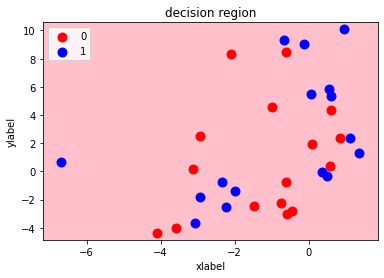

In [242]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train, y_train, a)